In [44]:
import numpy as np
import matplotlib.pyplot as plt

(3, 3, 40)


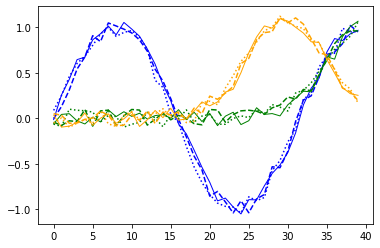

In [60]:
dt = 1.
dur = 40.

time_ = np.arange(0,dur, dt)
amp = 0.1

signal_0 = np.sin(0.2 * time_)
signal_0 = np.stack( (signal_0, signal_0, signal_0) )

signal_1 = np.exp(- 0.02 * (40.-time_)**2)
signal_1 += 0.8 * np.exp(- 0.02 * (80.-time_)**2)
signal_1 = np.stack( (signal_1, signal_1, signal_1) )

signal_2 = 1.1 * np.exp(- 0.02 * (30.-time_)**2)
signal_2 += 1.2 * np.exp(- 0.02 * (70.-time_)**2)
signal_2 = np.stack( (signal_2, signal_2, signal_2) )

signal_array = np.stack((signal_0, signal_1, signal_2), axis=0)

print(signal_array.shape)

for n in range(signal_array.shape[0]):
    for m in range(signal_array.shape[1]):
        for t in range(signal_array.shape[2]):
            signal_array[n,m,t] += np.random.uniform(-amp, amp)

color = ('blue', 'green', 'orange')
for n in range(signal_array.shape[0]):
    plt.plot(time_, signal_array[n,0,:], c=color[n], linewidth=1)
    plt.plot(time_, signal_array[n,1,:], c=color[n], linestyle=':')
    plt.plot(time_, signal_array[n,2,:], c=color[n], linestyle='--')

plt.show()

In [61]:
#### no square!

def f_cc(sig_):
    s_mean = np.mean(sig_, axis=1)
    s_std = np.sqrt( np.var(sig_, axis=1) )
        
    f_ = np.zeros((sig_.shape[2]))
        
    for n1 in range(sig_.shape[0]):
        for n2 in range(sig_.shape[0]):
            for m in range(sig_.shape[1]):
                for t in range(sig_.shape[2]):
                    f_[t] += 1. - ( (sig_[n1,m,t]  - s_mean[n1,t]) * (sig_[n2,m,t] - s_mean[n2,t])
                                     / ( s_std[n1,t] * s_std[n2,t]) )
    f_ /= (sig_.shape[0] + 1)**2 * (sig_.shape[1]+1)
        
    return f_
    

def f_int(f_,dt):
    cost = 0.
    for t in range(len(f_)):
        cost += dt * f_[t]
    return cost
        
def derSignal(signal_array, ds):
    der_signal = np.zeros((signal_array.shape))
    signal_ds = signal_array.copy()
    f_cc0 = f_cc(signal_array)

    for n in range(der_signal.shape[0]):
        for m in range(der_signal.shape[1]):
            for t in range(der_signal.shape[2]):
                signal_ds[n,m,t] += ds
                der_signal[n,m,t] = ( f_cc(signal_ds)[t] - f_cc0[t] ) / ds
                signal_ds[n,m,t] -= ds
            
    return der_signal

--------------- 0
cost =  11.412087189615255


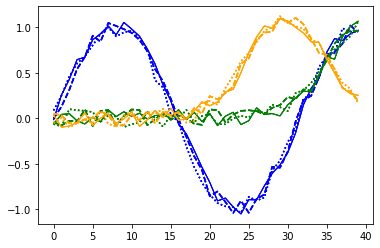

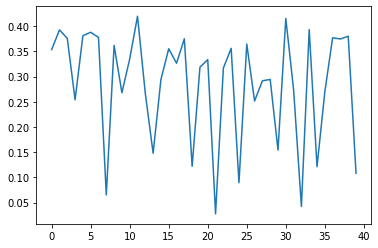

--------------- 1
cost =  3.0139998882436587
--------------- 2
cost =  0.45860865475996926
--------------- 3
cost =  0.054569745141738076
--------------- 4
cost =  0.008247802786416068
--------------- 5
cost =  0.0046006202149762795


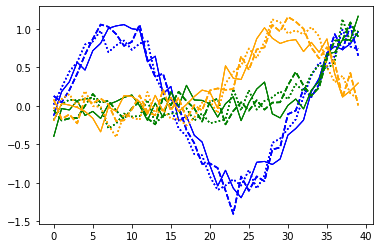

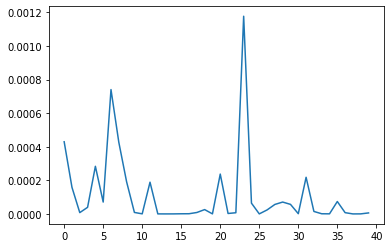

--------------- 6
cost =  0.003916362924511963
--------------- 7
cost =  0.0036519701154782737
--------------- 8
cost =  0.0033146317877321453
--------------- 9
cost =  0.0029282051566643322
--------------- 10
cost =  0.002508635211068342


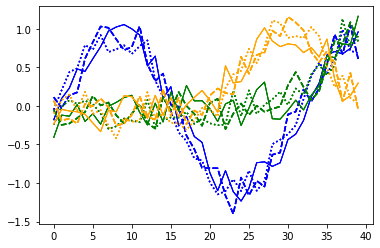

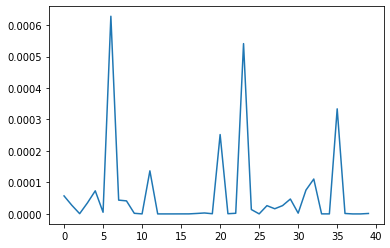

--------------- 11
cost =  0.002140914341078373
--------------- 12
cost =  0.0018451889127388977
--------------- 13
cost =  0.001642099912703936
--------------- 14
cost =  0.0014941328138495889
--------------- 15
cost =  0.0014354193742347077


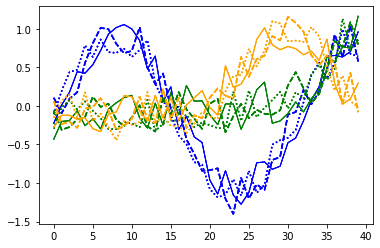

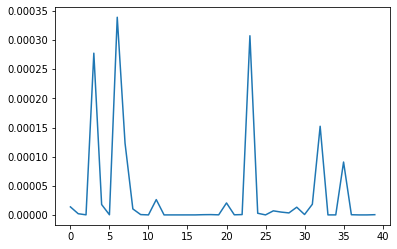

--------------- 16
cost =  0.001324821326986924
--------------- 17
cost =  0.0012768693448710795
--------------- 18
cost =  0.0011877109901389828
--------------- 19
cost =  0.0010818128028592354
--------------- 20
cost =  0.0009475525071064098


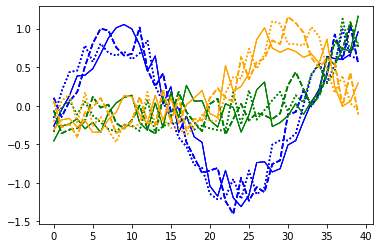

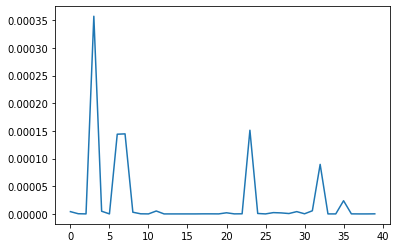

--------------- 21
cost =  0.0007936730551070612
--------------- 22
cost =  0.0006367037452333826
--------------- 23
cost =  0.0004946930937351646
--------------- 24
cost =  0.0003791152552593321
--------------- 25
cost =  0.0002916491778951237


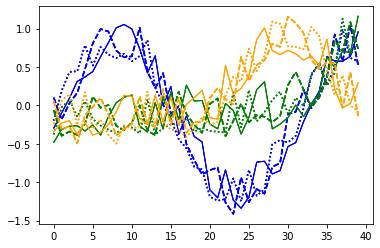

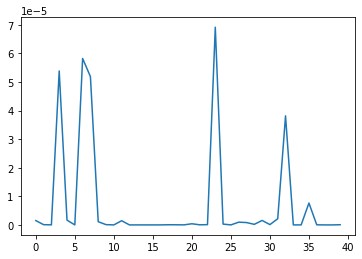

--------------- 26
cost =  0.00022749501656775875
--------------- 27
cost =  0.00018038331906495252
--------------- 28
cost =  0.00014520532771130149
--------------- 29
cost =  0.00011841029314089459


In [62]:
step = 0.1
ds = 0.1

for k in range(30):
    print("---------------", k)
    
    f_ = f_cc(signal_array)
    cost = f_int(f_,dt)
    print("cost = ", cost)
    
    if k%5 == 0:
    
        for n in range(signal_array.shape[0]):
            for m in range(signal_array.shape[1]):
                plt.plot(time_, signal_array[n,0,:], c=color[n], linewidth=1)
                plt.plot(time_, signal_array[n,1,:], c=color[n], linestyle=':')
                plt.plot(time_, signal_array[n,2,:], c=color[n], linestyle='--')
        plt.show()

        plt.plot(time_, f_)
        plt.show()
    
    der_signal = derSignal(signal_array, ds)
    signal_array -= step * der_signal